In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
)


In [2]:
data = pd.read_csv('C:\\Users\\HP\\Desktop\\career_change_prediction_dataset.csv')
data.head()

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
0,Medicine,Business Analyst,48,Male,7,High School,High,7,10,83,...,8,High,0,0,0,1,2,0,1,0
1,Education,Economist,44,Male,26,Master's,Low,10,3,55,...,3,Medium,0,0,1,1,2,1,9,0
2,Education,Biologist,21,Female,27,Master's,Low,8,3,78,...,4,Low,0,0,0,0,2,1,2,0
3,Education,Business Analyst,33,Male,14,PhD,Medium,7,9,62,...,2,Medium,1,0,0,0,9,0,1,0
4,Arts,Doctor,28,Female,0,PhD,Low,3,1,8,...,5,Low,0,0,1,0,2,0,7,1


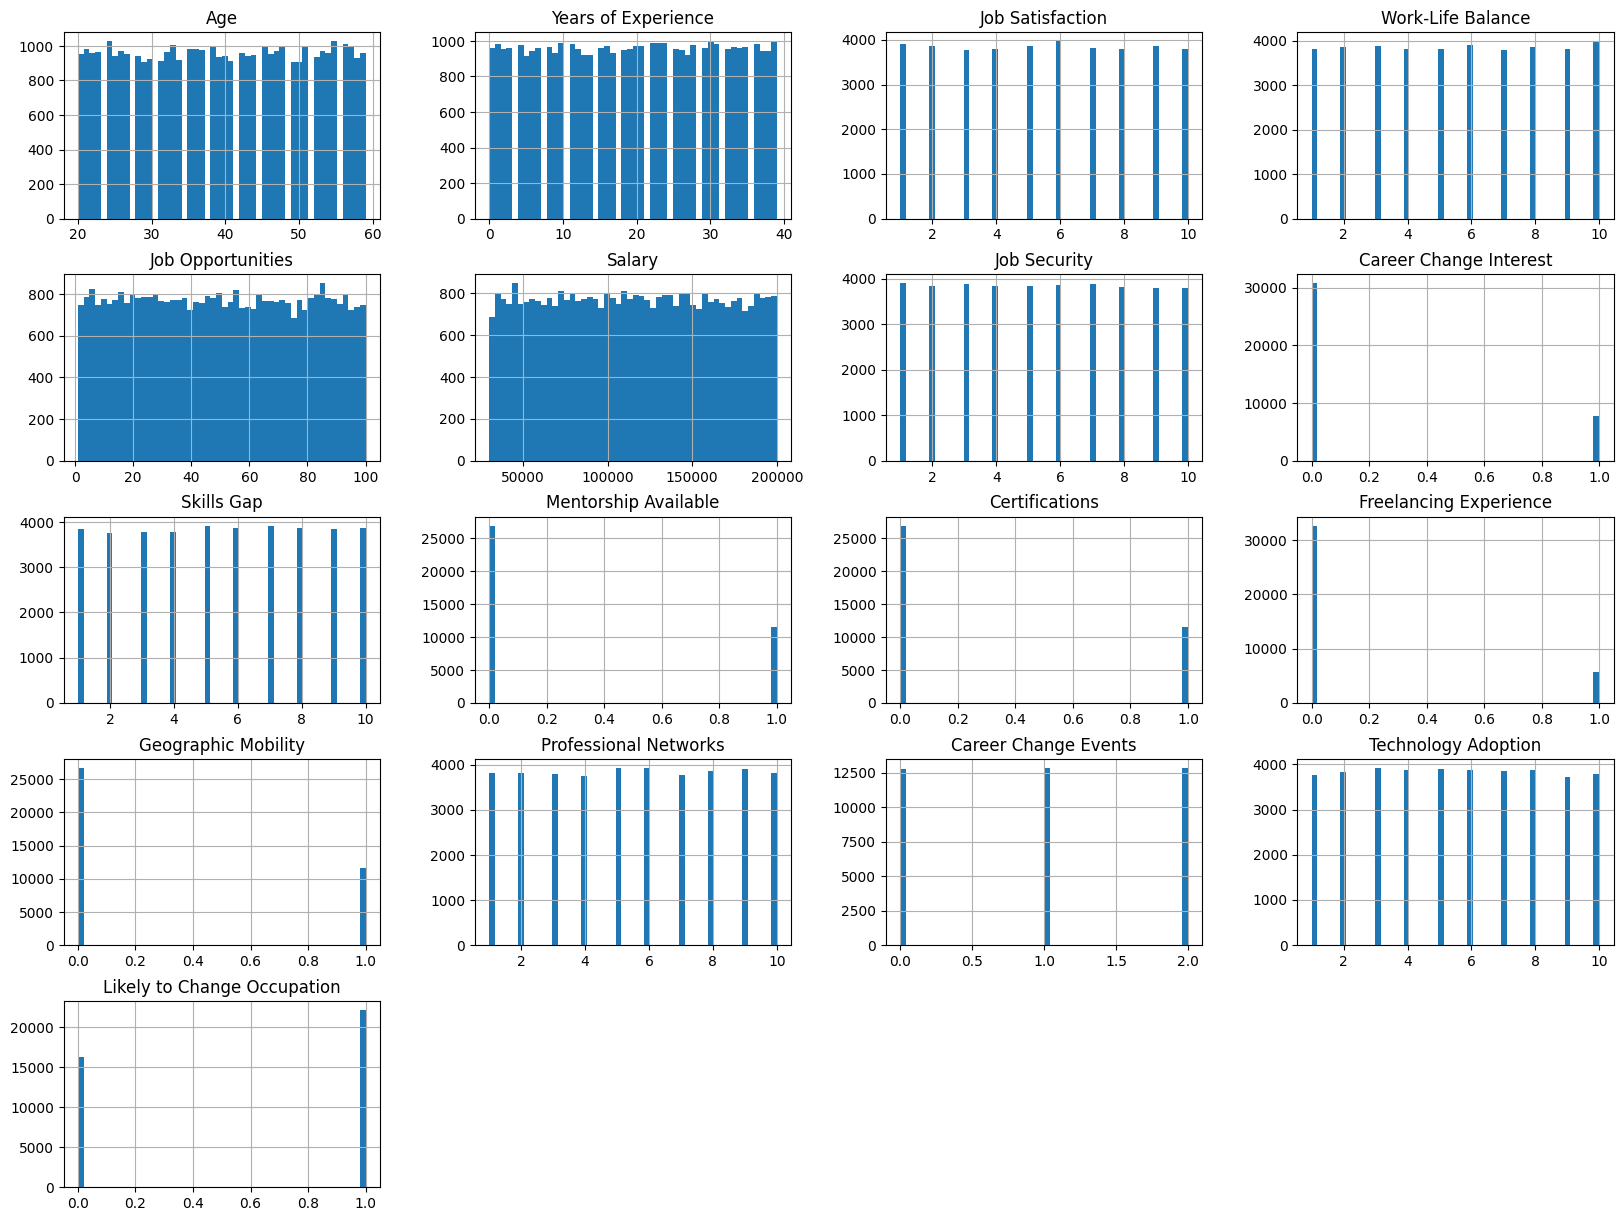

In [3]:
data.hist(bins=50, figsize=(20,15))
plt.show()

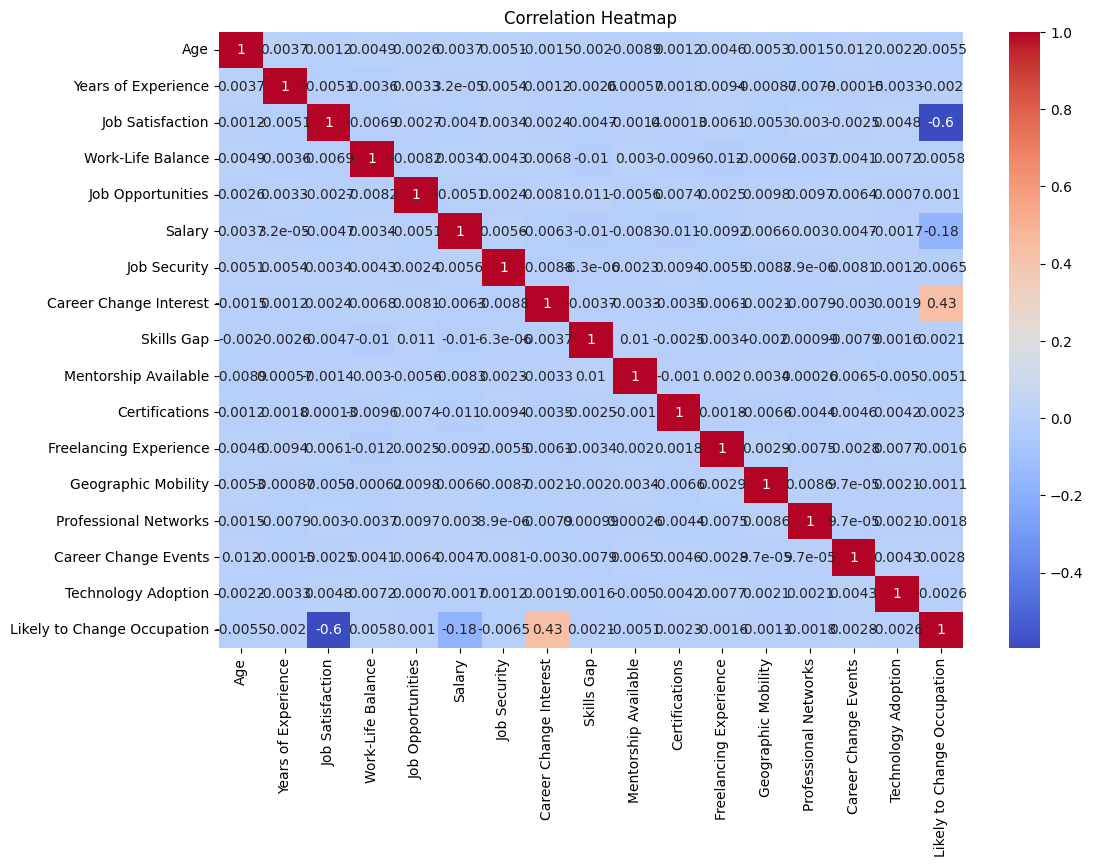

In [5]:
plt.figure(figsize=(12, 8))

# לבחור רק עמודות מספריות
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# לחשב ולצייר מתאם
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [6]:
family_dummies = pd.get_dummies(data['Family Influence'], drop_first=True)


In [7]:
skills_gap = data[['Skills Gap']]


In [8]:
X_q4 = pd.concat([family_dummies, skills_gap], axis=1)

# משתנה מטרה
y_q4 = data["Likely to Change Occupation"]

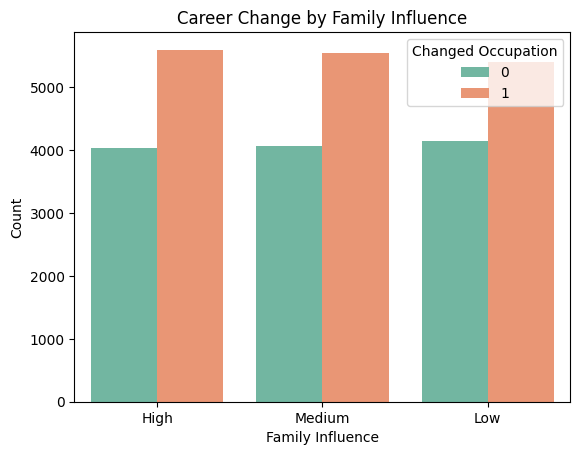

In [9]:
sns.countplot(x="Family Influence", hue="Likely to Change Occupation", data=data, palette="Set2")
plt.title("Career Change by Family Influence")
plt.xlabel("Family Influence")
plt.ylabel("Count")
plt.legend(title="Changed Occupation")
plt.show()


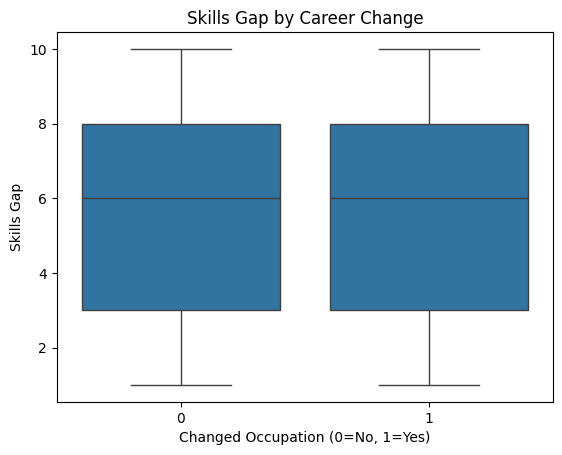

In [10]:
sns.boxplot(x="Likely to Change Occupation", y="Skills Gap", data=data)
plt.title("Skills Gap by Career Change")
plt.xlabel("Changed Occupation (0=No, 1=Yes)")
plt.ylabel("Skills Gap")
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# פיצול
X_train, X_test, y_train, y_test = train_test_split(X_q4, y_q4, test_size=0.3, random_state=42)

# סטנדרטיזציה
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

# הגדרת המודלים
models_q4 = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# הרצה ואיסוף תוצאות
results = []
roc_curves_q4 = {}

for name, model in models_q4.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    results.append([name, acc, prec, rec, auc])
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_curves_q4[name] = (fpr, tpr, auc)

# הצגת טבלה
import pandas as pd
results_df_q4 = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "AUC"])
print(results_df_q4)


                 Model  Accuracy  Precision  Recall       AUC
0  Logistic Regression  0.576903   0.576903     1.0  0.501008
1        Decision Tree  0.576903   0.576903     1.0  0.500647


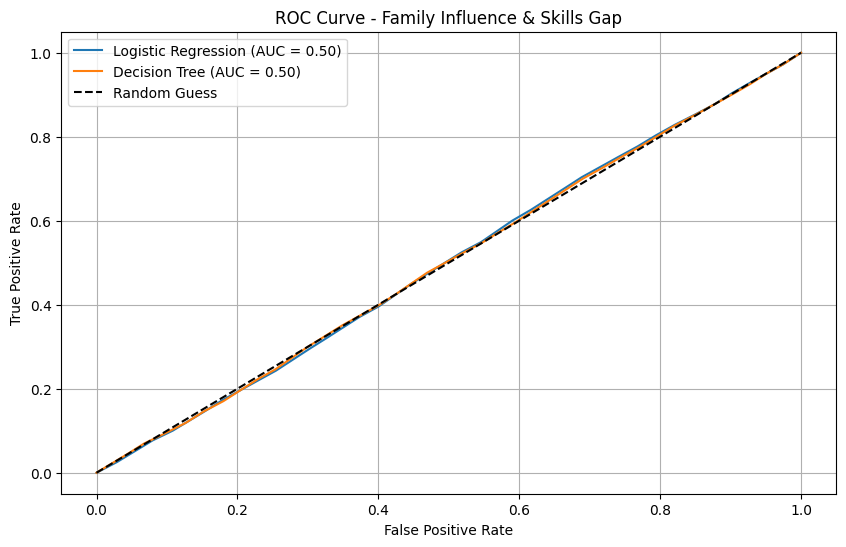

In [16]:
plt.figure(figsize=(10, 6))

for name, (fpr, tpr, auc) in roc_curves_q4.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Family Influence & Skills Gap")
plt.legend()
plt.grid(True)
plt.show()


 מסקנה מקצועית לשאלה 4:
- על פי המודלים, השפעת המשתנים Family Influence ו-Skills Gap על שינוי קריירה היא חלשה יחסית.
- המדדים AUC ≈ 0.5 מעידים שהמודלים אינם מצליחים להבדיל היטב בין עובדים שישנו עיסוק לאלו שלא.
- ייתכן כי משתנים אלה אינם מספיקים לבדם לניבוי מדויק ויש לשלבם עם משתנים נוספים כמו Job Satisfaction.

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,0.5,0.75,1,2],
             'solver':['newton-cg','sag','saga','lbfgs'],
             'max_iter':[50,100,200]}


logreg = LogisticRegression(random_state=42)
grid_logreg = GridSearchCV(logreg,param_grid,verbose=3,scoring='accuracy',cv=5)
grid_logreg.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END C=0.1, max_iter=50, solver=newton-cg;, score=0.577 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=50, solver=newton-cg;, score=0.576 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=50, solver=newton-cg;, score=0.576 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=50, solver=newton-cg;, score=0.576 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=50, solver=newton-cg;, score=0.576 total time=   0.0s
[CV 1/5] END ....C=0.1, max_iter=50, solver=sag;, score=0.577 total time=   0.0s
[CV 2/5] END ....C=0.1, max_iter=50, solver=sag;, score=0.576 total time=   0.0s
[CV 3/5] END ....C=0.1, max_iter=50, solver=sag;, score=0.576 total time=   0.0s
[CV 4/5] END ....C=0.1, max_iter=50, solver=sag;, score=0.576 total time=   0.0s
[CV 5/5] END ....C=0.1, max_iter=50, solver=sag;, score=0.576 total time=   0.0s
[CV 1/5] END ...C=0.1, max_iter=50, solver=saga;, score=0.577 total time=   0.0s
[CV 2/5] END ...C=0.1, max_iter=50, s

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 0.5, 0.75, 1, 2],
                         'max_iter': [50, 100, 200],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']},
             scoring='accuracy', verbose=3)

In [20]:
grid_logreg.best_estimator_

LogisticRegression(C=0.1, max_iter=50, random_state=42, solver='newton-cg')

In [21]:
logreg = LogisticRegression(C=2, max_iter=50, solver='newton-cg', random_state=42)

logreg.fit(X_train, y_train)

LogisticRegression(C=2, max_iter=50, random_state=42, solver='newton-cg')

In [22]:
predictions_logreg = logreg.predict(X_test)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [15]:
from sklearn.linear_model import LogisticRegression

# הגדרת המודל ואימון
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [16]:
predictions_logreg = logreg.predict(X_test)

print('Logistic Regression Train Accuracy:', 
      np.round(logreg.score(X_train, y_train) * 100, 2), '%')

print('Logistic Regression Test Accuracy:', 
      np.round(accuracy_score(y_test, predictions_logreg) * 100, 2), '%')


Logistic Regression Train Accuracy: 57.64 %
Logistic Regression Test Accuracy: 57.69 %


In [27]:
# תחזית
predictions_logreg = logreg.predict(X_test)

# דיוק על סט הבדיקה
print('Logistic Regression Test Accuracy:', np.round((accuracy_score(y_test, predictions_logreg)*100), 2), '%')


Logistic Regression Test Accuracy: 58.23 %


# Decision Tree

In [19]:
from sklearn.model_selection import GridSearchCV


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# הגדרת טווח הפרמטרים
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'class_weight': ['balanced', None]
}

# יצירת המודל
DT = DecisionTreeClassifier(random_state=42)

# ביצוע Grid Search
grid_DT = GridSearchCV(DT, param_grid, verbose=3, scoring='accuracy')
grid_DT.fit(X_train, y_train)


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, splitter=best;, score=0.503 total time=   0.0s
[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, splitter=best;, score=0.513 total time=   0.0s
[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, splitter=best;, score=0.538 total time=   0.0s
[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, splitter=best;, score=0.497 total time=   0.0s
[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, splitter=best;, score=0.495 total time=   0.0s
[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, splitter=random;, score=0.526 total time=   0.0s
[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, splitter=random;, score=0.514 total time=   0.0s
[CV 3/5]

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [1, 2, 5, 10, 15],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [21]:
print("Best Parameters:", grid_DT.best_params_)
print("Best Accuracy:", grid_DT.best_score_)


Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'splitter': 'best'}
Best Accuracy: 0.5764028242289113


In [22]:
grid_DT.best_estimator_

DecisionTreeClassifier(max_depth=5, random_state=42)

In [23]:
grid_DT.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [24]:
DT = DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_depth=5,
                            min_samples_leaf=2, splitter='random', random_state=42)

DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, min_samples_leaf=2, random_state=42,
                       splitter='random')

In [25]:
DT_pred = DT.predict(X_test)

In [26]:
print('Decision Tree Train Accuracy:','',np.round((DT.score(X_train,y_train)*100),2),'%')

Decision Tree Train Accuracy:  49.78 %


In [27]:
print('Decision Tree Test Accuracy:','',np.round((DT.score(X_test,y_test)*100),2),'%')
print('Decision Tree Test Accuracy:','',np.round((accuracy_score(y_test,DT_pred)*100),2),'%')

Decision Tree Test Accuracy:  48.52 %
Decision Tree Test Accuracy:  48.52 %


In [32]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# טען את הקובץ שלך
data = pd.read_csv('career_change_prediction_dataset.csv')

# נבחר רק את העמודות הרלוונטיות
df = data[['Skills Gap', 'Family Influence', 'Likely to Change Occupation']]


In [33]:
# קידוד דמי (נניח שהעמודה מכילה טקסטים כמו 'Low', 'Medium', 'High')
df = pd.get_dummies(df, columns=['Family Influence'], drop_first=True)


In [34]:
X = df.drop('Likely to Change Occupation', axis=1)
y = df['Likely to Change Occupation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [35]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5769030691867522
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4880
           1       0.58      1.00      0.73      6654

    accuracy                           0.58     11534
   macro avg       0.29      0.50      0.37     11534
weighted avg       0.33      0.58      0.42     11534



c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

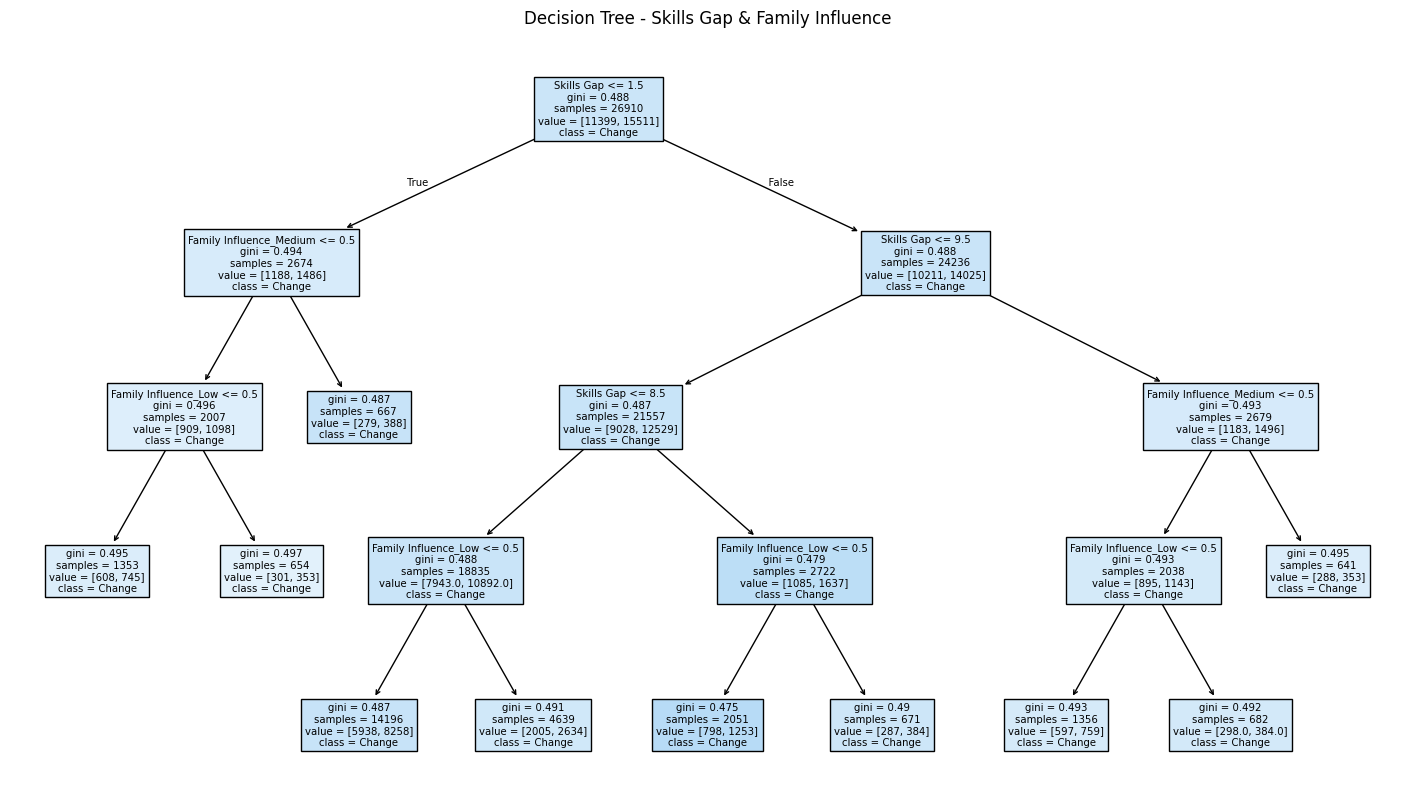

In [36]:
plt.figure(figsize=(18,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["No Change", "Change"])
plt.title("Decision Tree - Skills Gap & Family Influence")
plt.show()


In [48]:
selected_features = ['Skills Gap', 'Family Influence', 'Salary',
                     'Likely to Change Occupation']

In [49]:
df_subset = data[selected_features].copy()

In [50]:
df_encoded = pd.get_dummies(df_subset, columns=['Family Influence'], drop_first=True)


In [51]:
X = df_encoded.drop('Likely to Change Occupation', axis=1)
y = df_encoded['Likely to Change Occupation']


In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [53]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [54]:

# שלב 8: תחזוי והערכת ביצועים
y_pred = rf_model.predict(X_test)

# דיוק
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy * 100, 2)}%")

# דו"ח סיווג
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 55.4%

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.47      0.47      4880
           1       0.61      0.61      0.61      6654

    accuracy                           0.55     11534
   macro avg       0.54      0.54      0.54     11534
weighted avg       0.55      0.55      0.55     11534



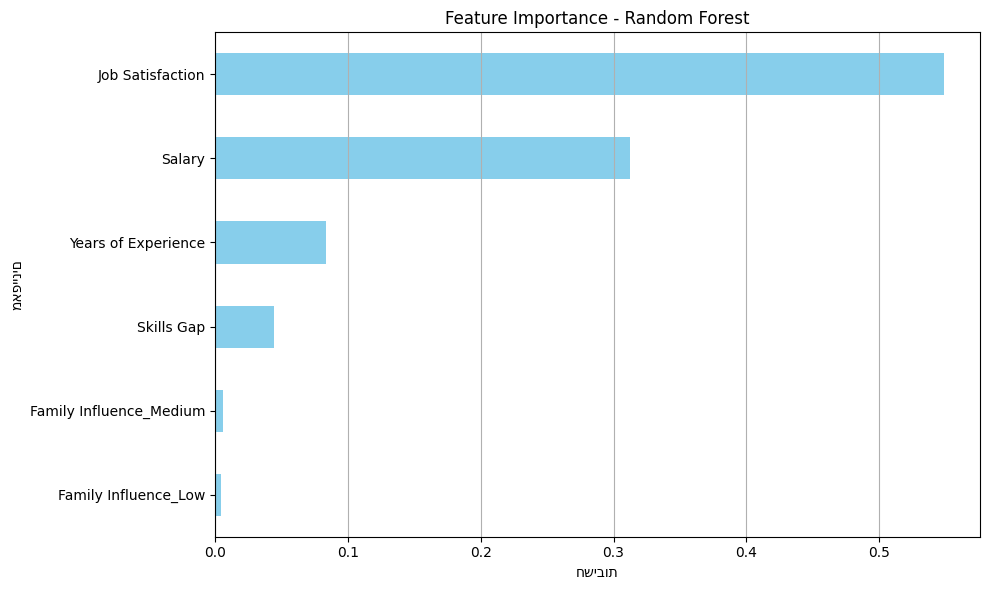

In [47]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
importances.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.xlabel("חשיבות")
plt.ylabel("מאפיינים")
plt.tight_layout()
plt.grid(True, axis='x')
plt.show()

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

# חיזוי
y_pred = log_model.predict(X_test)

# מטריצת בלבול
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# דוח סיווג
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[   0 3212]
 [   0 4477]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3212
           1       0.58      1.00      0.74      4477

    accuracy                           0.58      7689
   macro avg       0.29      0.50      0.37      7689
weighted avg       0.34      0.58      0.43      7689



c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [40]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print("\nModel Coefficients:")
print(coef_df)


Model Coefficients:
      Feature  Coefficient
2  Skills Gap     0.002880
1      Medium    -0.002510
0         Low    -0.064529


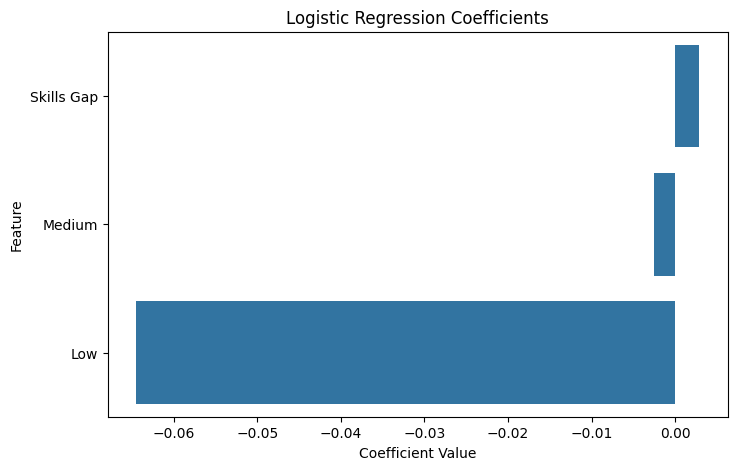

In [41]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, orient='h')
plt.title("Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

רמת המובהקות נמוכה ואין עדות לקשר משמעותי בין המשתנים הללו להחלטה לשנות עיסוק.

ניתן לומר באופן ברור שהמשתנים הללו לבדם אינם מוסיפים אות חזק לחיזוי שינוי העיסוק.

In [48]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
# Features for Q4
skills = data["Skills Gap"]
family = data["Family Influence"]
y = data["Likely to Change Occupation"]


In [51]:
group_no_change = data.loc[data["Likely to Change Occupation"]==0, "Skills Gap"]
group_change    = data.loc[data["Likely to Change Occupation"]==1, "Skills Gap"]


In [45]:
desc = pd.DataFrame({
    "No Change": group_no_change.describe(),
    "Change":    group_change.describe()
})
print(desc)

          No Change        Change
count  16279.000000  22165.000000
mean       5.513115      5.525288
std        2.885335      2.858851
min        1.000000      1.000000
25%        3.000000      3.000000
50%        6.000000      6.000000
75%        8.000000      8.000000
max       10.000000     10.000000


In [52]:
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(group_no_change, group_change)
print(f"t‑statistic = {stat:.2f}, p‑value = {p_value:.3f}")


t‑statistic = -0.41, p‑value = 0.681


In [53]:
# טבלת קרוס-טאב בין Family Influence ל‑Likely to Change Occupation
ct = pd.crosstab(data["Family Influence"], data["Likely to Change Occupation"])
print(ct)

# מבחן Chi‑square
chi2, p, dof, _ = chi2_contingency(ct)
print(f"χ² = {chi2:.2f}, p‑value = {p:.3f}, dof = {dof}")


Likely to Change Occupation     0     1
Family Influence                       
High                         4036  5599
Low                          4155  5404
Medium                       4073  5545
χ² = 5.17, p‑value = 0.075, dof = 2


In [54]:
# נחלק את העמודה 'Skills Gap' לפי מי ששינה עיסוק (y=1) ומי שלא (y=0)
group_no_change = data.loc[data["Likely to Change Occupation"]==0, "Skills Gap"]
group_change    = data.loc[data["Likely to Change Occupation"]==1, "Skills Gap"]

# נציג תיאור סטטיסטי (ממוצע, חציון, סטיית תקן וכו')
desc = pd.DataFrame({
    "No Change": group_no_change.describe(),
    "Change":    group_change.describe()
})
print(desc)


          No Change        Change
count  16279.000000  22165.000000
mean       5.513115      5.525288
std        2.885335      2.858851
min        1.000000      1.000000
25%        3.000000      3.000000
50%        6.000000      6.000000
75%        8.000000      8.000000
max       10.000000     10.000000


In [58]:
corr = np.corrcoef(data["Skills Gap"], data["Likely to Change Occupation"])[0,1]
print(f"Pearson correlation = {corr:.3f}")


Pearson correlation = 0.002
